# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

Зчитую дані з файлу у датафрейм


In [2]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv("clean_data2.csv", encoding='cp1252')
print(df)

              Country Name                      Region  GDP per capita  \
0              Afghanistan                  South Asia      561.778746   
1                  Albania       Europe & Central Asia     4124.982390   
2                  Algeria  Middle East & North Africa     3916.881571   
3           American Samoa         East Asia & Pacific    11834.745230   
4                  Andorra       Europe & Central Asia    36988.622030   
..                     ...                         ...             ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean        6.327732   
213     West Bank and Gaza  Middle East & North Africa     2943.404534   
214            Yemen, Rep.  Middle East & North Africa      990.334774   
215                 Zambia          Sub-Saharan Africa     1269.573537   
216               Zimbabwe          Sub-Saharan Africa     1029.076649   

     Population   CO2 emission       Area     Density  
0      34656032    9809.225000   652860.0   53.083405  

<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [3]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm1 = LinearRegression()

x = df[['Population']]
y = df['CO2 emission']

lm1.fit(x, y)

Yhat1=lm1.predict(x)

Yhat1[0:10]

array([158312.77633003,   4165.74155524, 187173.06365573,  -9514.96844619,
        -9409.80094258, 129973.67493875,  -9294.93253467, 202895.21255795,
         4402.03133193,  -9276.21463981])

Знаходжу коефіцієнти моделі


In [4]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm1.intercept_, lm1.coef_)

-9784.648735498631 [0.00485045]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = -9784.648735498631 + 0.00485045 * Population
$$

Підставляючи фактичні значення, маємо:

In [5]:
# Напишіть рівняння моделі, виконувати не потрібно
population = 34656032

print(lm1.predict([[population]]))

[158312.77633003]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Створюю об’єкт лінійної регресії та навчаю другу модель


In [6]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm2 = LinearRegression()

x = df[['Area']]
y = df['CO2 emission']

lm2.fit(x, y)

Yhat2=lm2.predict(x)

Yhat2[0:10]

array([164894.48059502,   1894.00004074, 616430.70148666,  -5562.47993847,
        -5491.9633152 , 319989.26416258,  -5499.79849556, 720549.80160967,
         2152.56099273,  -5567.70339205])

Знаходжу коефіцієнти моделі


In [7]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm2.intercept_, lm2.coef_)

-5614.714474228735 [0.26117268]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = -5614.714474228735 + 0.26117268 * Area
$$

Підставляючи фактичні значення, маємо:


In [8]:
# Напишіть рівняння моделі, виконувати не потрібно

area = 652000

print(lm2.predict([[area]]))

[164669.87209127]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [42]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
z = df[['Population', 'Area']]

lm3 = LinearRegression()

lm3.fit(z, df['CO2 emission'])

Yhat3 = lm3.predict(z)

Yhat3[0:10]

array([162198.98902431, -45462.51926112, 402591.43505412, -60537.49220539,
       -60415.29031767, 212597.92686989, -60322.43123902, 465649.17398869,
       -45140.03388658, -60339.1901485 ])

Знаходжу коефіцієнти моделі


In [10]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm3.intercept_, lm3.coef_)

-60789.30599349941 [0.00407944 0.12500562]


$$
Yhat3 = -60789.30599349941 + 0.00407944* Population + 0.12500562*Area
$$

Підставляючи фактичні значення, маємо:

In [11]:
# Напишіть рівняння моделі, виконувати не потрібно
population = 34656032
area = 652000

print(lm3.predict([[population, area]]))

[162091.48419462]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [12]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
f4 = np.polyfit(df['Population'], df['CO2 emission'], 2)

p4 = np.poly1d(f4)
print(p4)

population = 34656032
print("\nПрогноз по фактичним даним:", p4(population))

            2
-3.972e-13 x + 0.005348 x - 1.919e+04

Прогноз по фактичним даним: 165684.75134640624


$$
Yhat4 = -1.919*10^4 + 0.005348 *Population + -3.972*10^{-13} * Population^2  
$$

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [13]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
f5 = np.polyfit(df['Area'], df['CO2 emission'], 2)

p5 = np.poly1d(f5)
print(p5)

area = 652000
print("\nПрогноз по фактичним даним:", p5(area))

            2
-1.525e-08 x + 0.4425 x - 6.128e+04

Прогноз по фактичним даним: 220770.52337759885


$$
Yhat5 = 6.128*10^3 + 0.4425 *Area + -1.525*10^{-08} * Area^2  
$$

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

pr=PolynomialFeatures(degree=2)
z_pr = pr.fit_transform(z)

print(z.shape,z_pr.shape)
print(pr.get_params())

p6 = LinearRegression()

y = df['CO2 emission']

p6.fit(z_pr, y)

(217, 2) (217, 6)
{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


LinearRegression()

In [134]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

pipe.fit(z, y)
ypipe=pipe.predict(z)
ypipe[0:10]


array([118101.667091  ,   8841.32501777, 229045.61639412,   1337.84241013,
         1396.46598068, 129772.29960276,   1451.83583943, 263041.5395112 ,
         8986.4190027 ,   1454.04808905])

In [17]:

print('\nКоефіцієнти:\n', pipe.named_steps['model'].intercept_, pipe.named_steps['model'].coef_)

population = 34656032
area = 652000

print('\nПідставляння фактичних даних:\n',pipe.predict([[population, area]]))


Коефіцієнти:
 114866.64172676989 [373587.99648854 101998.07798248 -57207.06908492 249104.93171
 -14676.76868185]

Підставляння фактичних даних:
 [118053.40500603]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


$$
Yhat6 = 114866.64172676989 +  373587.99648854*Population + 101998.0779824*Area -57207.06908492*Population*Area + 249104.93171 Population^2  -14676.76868185 Area^2
$$

---



<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

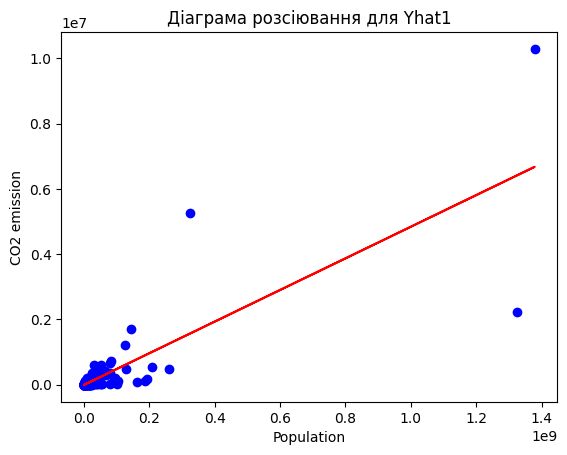

In [19]:
x_p = df[['Population']]

plt.scatter(x_p, y, color='blue')
plt.title('Діаграма розсіювання для Yhat1')
plt.xlabel('Population')
plt.ylabel('CO2 emission')

plt.plot(x_p, Yhat1, color='red')
plt.show()
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


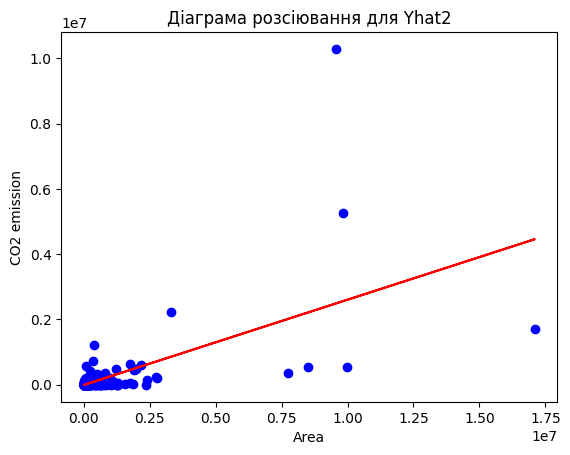

In [20]:
x_a = df[['Area']]

plt.scatter(x_a, y, color='blue')
plt.title('Діаграма розсіювання для Yhat2')
plt.xlabel('Area')
plt.ylabel('CO2 emission')

plt.plot(x_a, Yhat2, color='red')
plt.show()

Для візуалізації дисперсії даних використаю діаграми залишків.


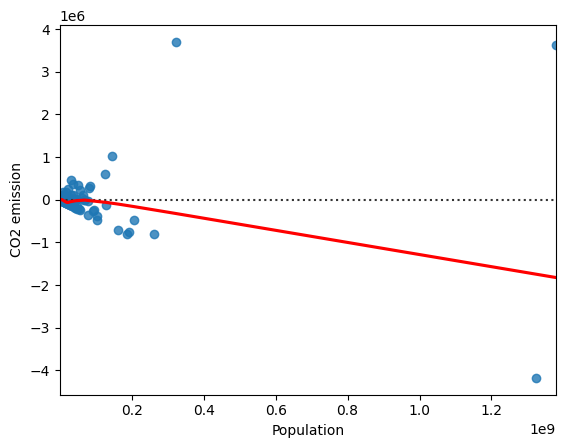

In [39]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
sns.residplot(x=df['Population'], y=df['CO2 emission'], lowess=True, line_kws={'color': 'red'})
plt.show()

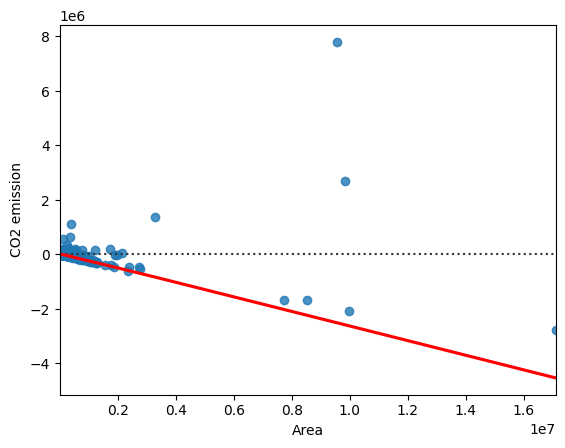

In [40]:
sns.residplot(x=df['Area'], y=df['CO2 emission'], lowess=True, line_kws={'color': 'red'})
plt.show()

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


<ipython-input-48-13d5475b14ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-48-13d5475b14ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat3, hist=False, color="b", label="Fitted V

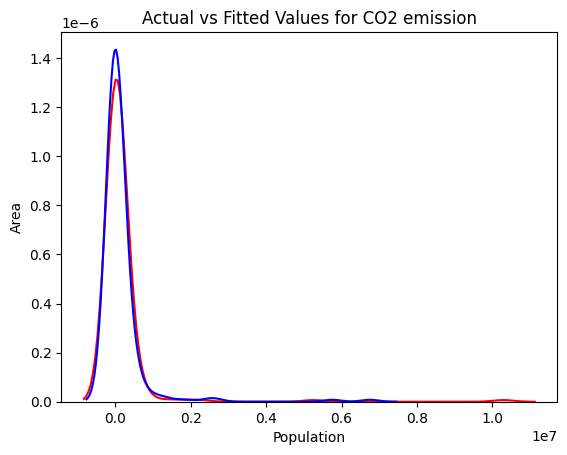

In [48]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("Population")
plt.ylabel("Area")

plt.show()
plt.close()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>


In [79]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(0, independent_variable.max(), 10000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit for Yhat4")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("CO2 emission")

    plt.show()
    plt.close()

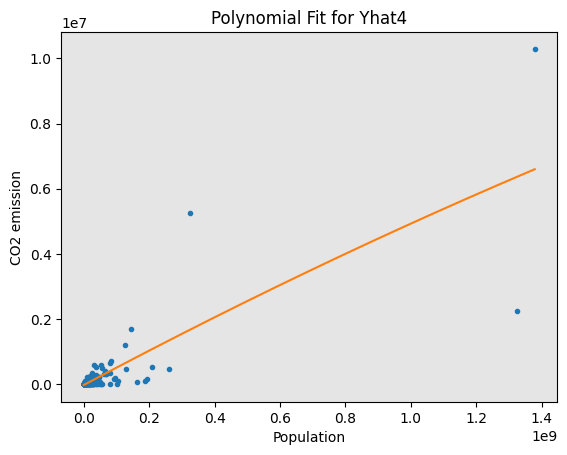

In [80]:
PlotPolly(p4, x_p, y, 'Population')

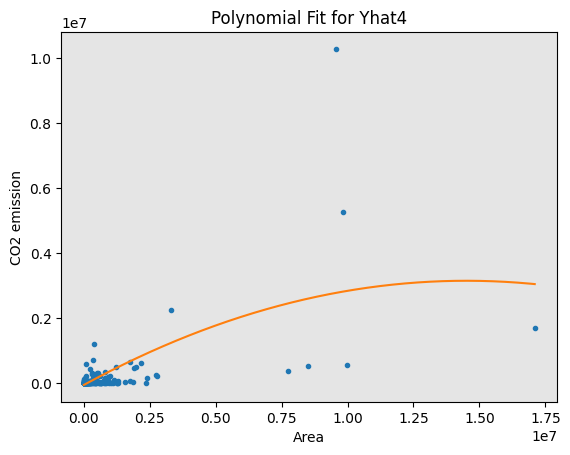

In [81]:
PlotPolly(p5, x_a, y, 'Area')

Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


<ipython-input-84-7a544c6078d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-84-7a544c6078d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe, hist=False, color="b", label="Fitted V

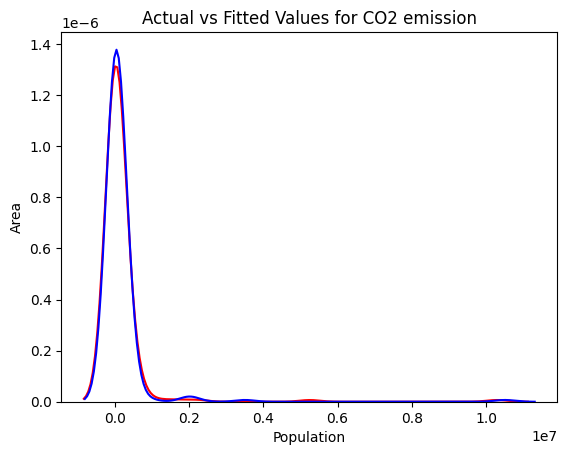

In [84]:
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("Population")
plt.ylabel("Area")

plt.show()
plt.close()

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


In [88]:
from sklearn.metrics import mean_squared_error

Модель 1:
$$
Yhat1 = a + b  X
$$


In [104]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat1 is: ', lm1.score(x_p, y))
print('The mean square error of actual and predicted value for Yhat1 is: ',
      f"{mean_squared_error(y, Yhat1):.8e}")

The R-square for Yhat1 is:  0.6468593619245477
The mean square error of actual and predicted value for Yhat1 is:  2.31156943e+11


Модель 2:
$$
Yhat2 = a + b  X
$$

In [105]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat2 is: ', lm2.score(x_a, y))
print('The mean square error of actual and predicted value for Yhat2 is: ',
      f"{mean_squared_error(y, Yhat2):.8e}")

The R-square for Yhat2 is:  0.34654693986415996
The mean square error of actual and predicted value for Yhat2 is:  4.27733870e+11


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [106]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat3 is: ', lm3.score(z, y))
print('The mean square error of actual and predicted value for Yhat3 is: ',
      f"{mean_squared_error(y, Yhat3):.8e}")

The R-square for Yhat3 is:  0.7099048811998729
The mean square error of actual and predicted value for Yhat3 is:  1.89888938e+11


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [107]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat4 is: ', r2_score(y, p4(x_p)))
print('The mean square error of actual and predicted value for Yhat4 is: ',
      f"{mean_squared_error(y, p4(x_p)):.8e}")

The R-square for Yhat4 is:  0.6474091088349259
The mean square error of actual and predicted value for Yhat4 is:  2.30797093e+11


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [108]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat5 is: ', r2_score(y, p5(x_a)))
print('The mean square error of actual and predicted value for Yhat5 is: ',
      f"{mean_squared_error(y, p5(x_a)):.8e}")

The R-square for Yhat5 is:  0.37503241558027023
The mean square error of actual and predicted value for Yhat5 is:  4.09087997e+11


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [112]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('The R-square for Yhat6 is: ', r2_score(y, ypipe))
print('The mean square error of actual and predicted value for Yhat6 is: ',
      f"{mean_squared_error(y, ypipe):.8e}")

The R-square for Yhat6 is:  0.9381328840329533
The mean square error of actual and predicted value for Yhat6 is:  4.04966516e+10


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>множинна поліноміальна модель другого порядку Yhat6 (предиктори: Population та Area) є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. R^2 = 0.9381328840329533, тобто приблизно 93% варіації викидів пояснюються цією моделлю, а MSE = 4.04966516e+10, що менше за найменше серед усіх інших приблизно у 5 разів.</p>
<p>P.S. Серед лінійних моделей найбільше R^2 та найменше MSE має множинна модель Yhat3</p>


<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей.
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


За попередніми результатами можна зробити висновок, що множинні моделі набагато краще підходять для прогнозування даних.

Створимо поліноміальні множинні моделі 3 та 4 порядку.

Будуємо модель 3 порядку

In [139]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=3)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

pipe.fit(z, y)
ypipe7=pipe.predict(z)
ypipe7[0:10]

array([ 87762.54659047,  12680.83475085, 149297.46426928,   3394.83959103,
         3471.85858329, 101195.81350794,   3528.12697493, 172120.34372945,
        12875.40936752,   3515.46200448])

<ipython-input-140-1dcd5286eef1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-140-1dcd5286eef1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe7, hist=False, color="b", label="Fitte

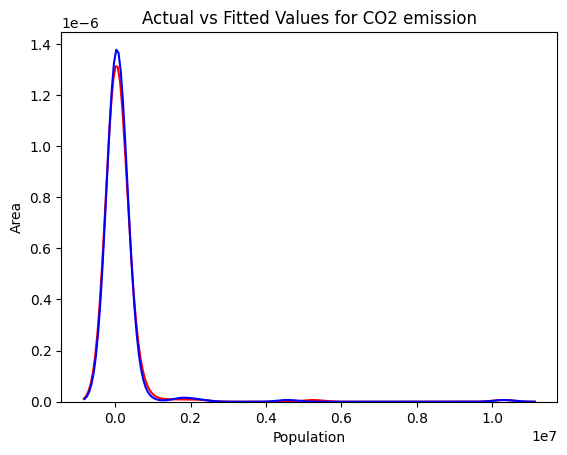

In [140]:
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe7, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("Population")
plt.ylabel("Area")

plt.show()
plt.close()

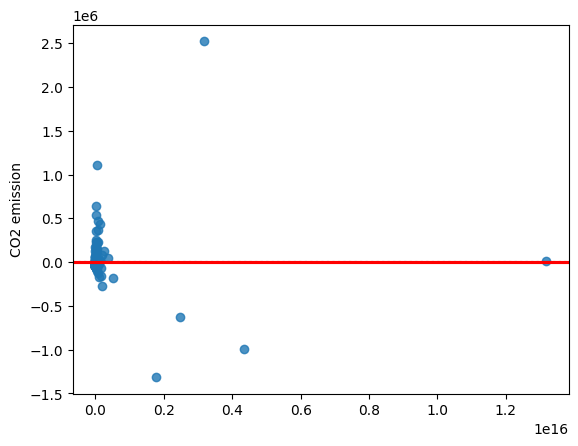

In [147]:
sns.residplot(x=df['Area'] * df['Population'], y=df['CO2 emission'], lowess=True, line_kws={'color': 'red'}, order=3)
plt.show()

In [141]:
print('The R-square for Yhat7 is: ', r2_score(y, ypipe7))
print('The mean square error of actual and predicted value for Yhat7 is: ',
      f"{mean_squared_error(y, ypipe7):.8e}")

The R-square for Yhat7 is:  0.9589646928712889
The mean square error of actual and predicted value for Yhat7 is:  2.68606757e+10


Порівняно із множинною поліноміальною моделлю другого порядку, R^2 збільшилось на ~3%,  а MSE зменшилось вдвічі.

Будуємо модель 4 порядку

In [143]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=4)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

pipe.fit(z, y)
ypipe8=pipe.predict(z)
ypipe8[0:10]

array([ 92943.06851494,  11002.927017  , 154239.2683525 ,  -3273.26057563,
        -3167.33336409,  57737.94454213,  -3013.26689074, 187854.4203334 ,
        11180.01804774,  -2957.95808369])

<ipython-input-144-653637613e73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
<ipython-input-144-653637613e73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe8, hist=False, color="b", label="Fitte

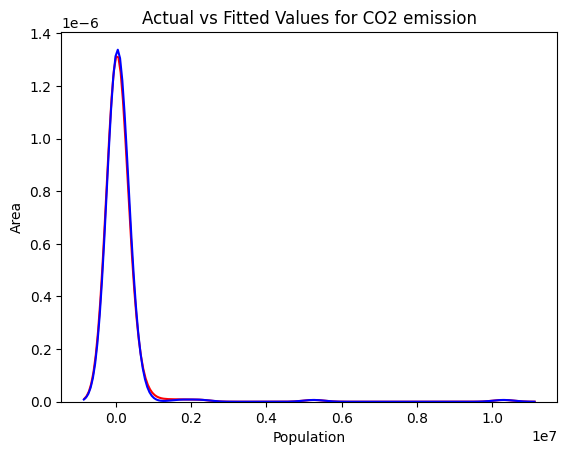

In [144]:
ax1 = sns.distplot(df['CO2 emission'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe8, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for CO2 emission")
plt.xlabel("Population")
plt.ylabel("Area")

plt.show()
plt.close()

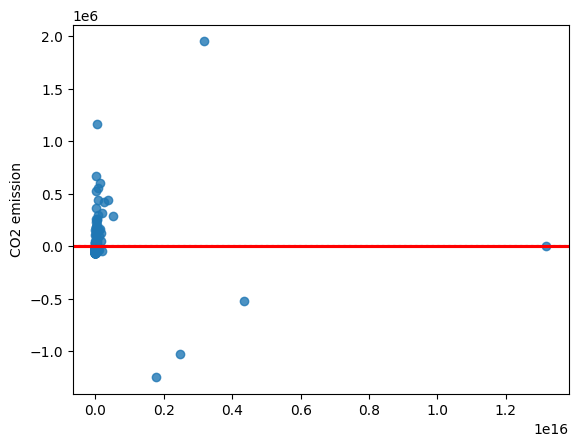

In [148]:
sns.residplot(x=df['Area'] * df['Population'], y=df['CO2 emission'], lowess=True, line_kws={'color': 'red'}, order=4)
plt.show()

In [153]:
print('The R-square for Yhat8 is: ', r2_score(y, ypipe8))
print('The mean square error of actual and predicted value for Yhat8 is: ',
      f"{mean_squared_error(y, ypipe8):.8e}")

The R-square for Yhat8 is:  0.9845841238667445
The mean square error of actual and predicted value for Yhat8 is:  1.00908432e+10


Порівняно із попередньою моделлю, R^2 знов збільшилось на ~3%,  а MSE зменшилось вдвічі.

Також, в ході роботи було визначено, що Population є кращим предиктором, ніж Area.

Порівняймо множинну поліноміальну модель 4 порядку із поліноміальною моделлю 4 порядку, створену лише на основі предиктора Population.

Будую модель 4 порядку для предиктора Population.

In [150]:
f9 = np.polyfit(df['Population'], df['CO2 emission'], 4)

p9 = np.poly1d(f9)
print(p9)

population = 34656032
print("\nПрогноз по фактичним даним:", p9(population))

           4             3             2
9.892e-29 x - 1.982e-19 x + 9.396e-11 x - 0.004814 x + 6.098e+04

Прогноз по фактичним даним: -1124.7584049121433


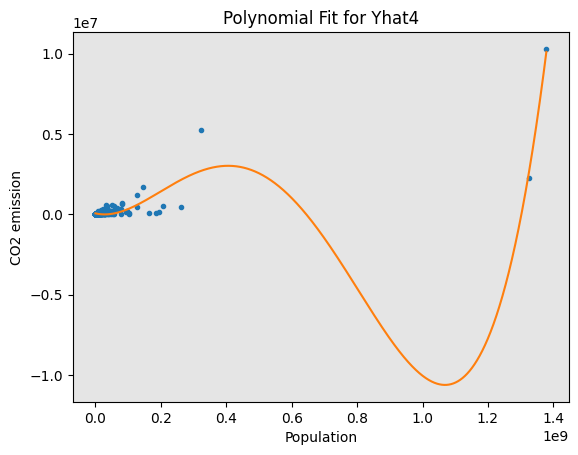

In [152]:
PlotPolly(p9, x_p, y, 'Population')

Як видно з графіку, викиди дуже сильно впливають на цю модель.

In [154]:
print('The R-square for Yhat9 is: ', r2_score(y, p9(x_p)))
print('The mean square error of actual and predicted value for Yhat9 is: ',
      f"{mean_squared_error(y, p9(x_p)):.8e}")

The R-square for Yhat9 is:  0.8710375952767171
The mean square error of actual and predicted value for Yhat9 is:  8.44155331e+10


Як видно, поліноміальна модель з одним предиктором виявляється гіршою ніж із двома.

Також у минулій роботі було виявлено слабку кореляцію між CO2 emission та GDP per capita.

Побудуємо поліноміальну модель 3 порядку, засновану на 3 предикторах.

In [157]:
x_g = df[['GDP per capita']]

z_updated = df[['Population', 'Area', 'GDP per capita']]

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=3)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

pipe.fit(z_updated, y)
ypipe10=pipe.predict(z_updated)
ypipe10[0:10]

array([ 44078.49652194,   4474.28780456, 140736.48204357,   4572.67100044,
        22719.21176856,  88397.87722756,   7137.62151041, 370424.50263092,
         3625.97377241,  -7776.58644558])

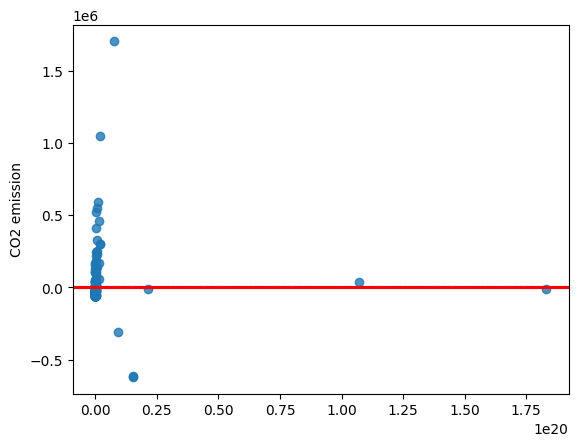

In [163]:
sns.residplot(x=df['Area'] * df['Population']*df['GDP per capita'], y=df['CO2 emission'], lowess=True, line_kws={'color': 'red'}, order=3)
plt.show()

In [164]:
print('The R-square for Yhat10 is: ', r2_score(y, ypipe10))
print('The mean square error of actual and predicted value for Yhat10 is: ',
      f"{mean_squared_error(y, ypipe10):.8e}")

The R-square for Yhat10 is:  0.9948977976299725
The mean square error of actual and predicted value for Yhat10 is:  3.33977281e+09


<h4>Як видно із значень мір для оцінки моделі, множинна поліноміальна модель третього порядку, заснована на трьох предикторах впоралася найкраще із завданням.</h4>

<h3>Висновок: чим більший порядок поліноміальної моделі і чим більша кількість предикторів, тим точніше модель прогнозує дані. Однак зі збільшенням порядку і числа предикторів зростає складність моделі, а швидкість росту точності сповільнюється.</h3>

<h2>Виконав студент групи ІП-24<br>  Новиков Гліб</h2>